# Libraries

In [2]:
import os
import sys
sys.path.append('/home/kurose/Desktop/master/viu_master_thesis')

import importlib
import models.model_utils

importlib.reload(models.model_utils)
from models.model_utils import load_dataset, get_input_shape, f1_score, get_callbacks, save_and_print_model, get_metrics, plot_metrics

import tensorflow as tf

tf.random.set_seed(42)

# Model 2

## Dataset 

In [3]:

train, val, _ = load_dataset(batch_size=2)

## Architecture

In [4]:
def model_v2(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    
    # First block: 3D Convolution + BatchNormalization + ReLU + MaxPooling
    x = tf.keras.layers.Conv3D(filters=32, kernel_size=(3, 3, 3), padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2))(x)
    
    # Second block: 3D Convolution + BatchNormalization + ReLU + MaxPooling
    x = tf.keras.layers.Conv3D(filters=64, kernel_size=(3, 3, 3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2))(x)

    # Third block: 3D Convolution + BatchNormalization + ReLU + MaxPooling
    x = tf.keras.layers.Conv3D(filters=128, kernel_size=(3, 3, 3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2))(x)
    
    # Fourth block: 3D Convolution + BatchNormalization + ReLU + MaxPooling
    x = tf.keras.layers.Conv3D(filters=256, kernel_size=(3, 3, 3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2))(x)

    # Global Average Pooling 3D instead of Flatten
    x = tf.keras.layers.GlobalAveragePooling3D()(x)

    # Fully connected layers (Dense layers) + Dropouts
    x = tf.keras.layers.Dense(units=512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x) 
    
    x = tf.keras.layers.Dense(units=256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)
    
    # Define the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

In [8]:
input_shape = get_input_shape(train)
model = model_v2(input_shape)
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=get_metrics())

In [9]:
save_and_print_model(model, file_path="model_v2.png")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 33, 128, 128,   │             0 │
│                                 │ 1)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_4 (Conv3D)               │ (None, 33, 128, 128,   │           896 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 33, 128, 128,   │           128 │
│ (BatchNormalization)            │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 33, 128, 128,   │             0 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_4 (MaxPooling3D)  │ (None, 16, 64, 64, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_5 (Conv3D)               │ (None, 16, 64, 64, 64) │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 64, 64, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 16, 64, 64, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_5 (MaxPooling3D)  │ (None, 8, 32, 32, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_6 (Conv3D)               │ (None, 8, 32, 32, 128) │       221,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 32, 32, 128) │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 8, 32, 32, 128) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_6 (MaxPooling3D)  │ (None, 4, 16, 16, 128) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_7 (Conv3D)               │ (None, 4, 16, 16, 256) │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 4, 16, 16, 256) │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 4, 16, 16, 256) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_7 (MaxPooling3D)  │ (None, 2, 8, 8, 256)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling3d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling3D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,32

 Total params: 1,427,649 (5.45 MB)

 Trainable params: 1,426,689 (5.44 MB)

 Non-trainable params: 960 (3.75 KB)

Model architecture saved to model_v2.png


# Training

In [10]:
callbacks = get_callbacks(
    checkpoint_path='best_model_v2.weights.h5',
    monitor_metric='val_accuracy',
    patience=5,
    reduce_factor=0.1,
    reduce_patience=2,
    reduce_min_lr=1e-6)
              
history = model.fit(train, validation_data=val, epochs=25, callbacks=callbacks)

Epoch 1/25


2024-10-08 19:52:52.899042: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138412032 exceeds 10% of free system memory.
2024-10-08 19:52:53.177231: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138412032 exceeds 10% of free system memory.
2024-10-08 19:52:53.347317: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138412032 exceeds 10% of free system memory.
2024-10-08 19:52:53.586051: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2024-10-08 19:52:53.790412: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.


      8/Unknown 55s 6s/step - accuracy: 0.6097 - auc: 0.5284 - f1_score: 0.4062 - loss: 0.7319

2024-10-08 19:53:41.932254: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.5906 - auc: 0.5183 - f1_score: 0.3960 - loss: 0.7463 - val_accuracy: 0.5000 - val_auc: 0.2500 - val_f1_score: 0.3333 - val_loss: 0.7794 - learning_rate: 1.0000e-04
Epoch 2/25


2024-10-08 19:53:43.529999: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 46s 6s/step - accuracy: 0.4161 - auc: 0.5268 - f1_score: 0.2151 - loss: 0.6922 - val_accuracy: 0.5000 - val_auc: 0.0000e+00 - val_f1_score: 0.3333 - val_loss: 0.8263 - learning_rate: 1.0000e-04
Epoch 3/25


2024-10-08 19:54:30.074332: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 0.6144 - auc: 0.6169 - f1_score: 0.2266 - loss: 0.6953 - val_accuracy: 0.5000 - val_auc: 0.0000e+00 - val_f1_score: 0.3333 - val_loss: 0.8542 - learning_rate: 1.0000e-04
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 0.5839 - auc: 0.3134 - f1_score: 0.0694 - loss: 0.7663 - val_accuracy: 0.5000 - val_auc: 0.0000e+00 - val_f1_score: 0.3333 - val_loss: 0.8354 - learning_rate: 1.0000e-05
Epoch 5/25


2024-10-08 19:56:00.910449: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 6s/step - accuracy: 0.5746 - auc: 0.7454 - f1_score: 0.3140 - loss: 0.6702 - val_accuracy: 0.5000 - val_auc: 0.0000e+00 - val_f1_score: 0.3333 - val_loss: 0.8296 - learning_rate: 1.0000e-05
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 0.8706 - auc: 0.9757 - f1_score: 0.2445 - loss: 0.4769 - val_accuracy: 0.5000 - val_auc: 0.0000e+00 - val_f1_score: 0.3333 - val_loss: 0.8197 - learning_rate: 1.0000e-06


Plot saved to model_v2_metrics.png


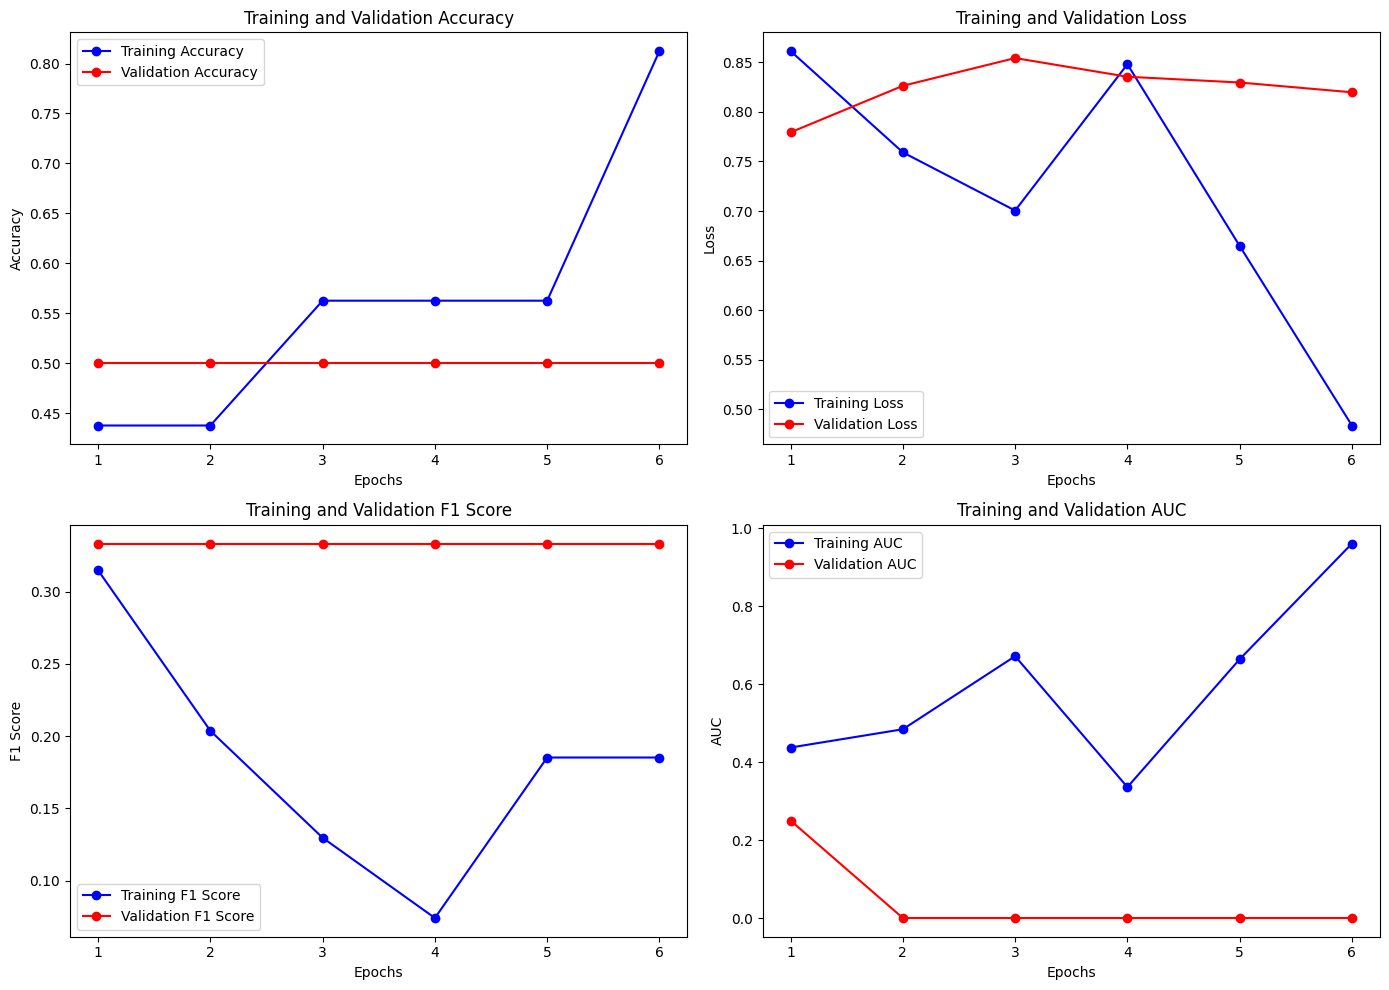

In [11]:
plot_metrics(history, "model_v2_metrics.png")